1. Perkenalan Dataset

Dataset ini berasal dari UCI Machine Learning Repository. Link Dataset: Heart Disease Dataset - UCI. Deskripsi: Dataset ini berisi 76 atribut, namun semua eksperimen yang dipublikasikan merujuk pada penggunaan subset dari 14 atribut tersebut. Atribut target (num) menunjukkan adanya penyakit jantung pada pasien dengan skala 0 (sehat) hingga 4.

2. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

3. Memuat Dataset

In [2]:
# Memuat dataset dari folder raw
df = pd.read_csv('../heart_disease_uci_raw/heart_disease_uci.csv')

# Menampilkan 5 baris pertama
print(df.head())

# Menampilkan informasi dasar dataset
print(df.info())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
<class '

4. Exploratory Data Analysis (EDA)

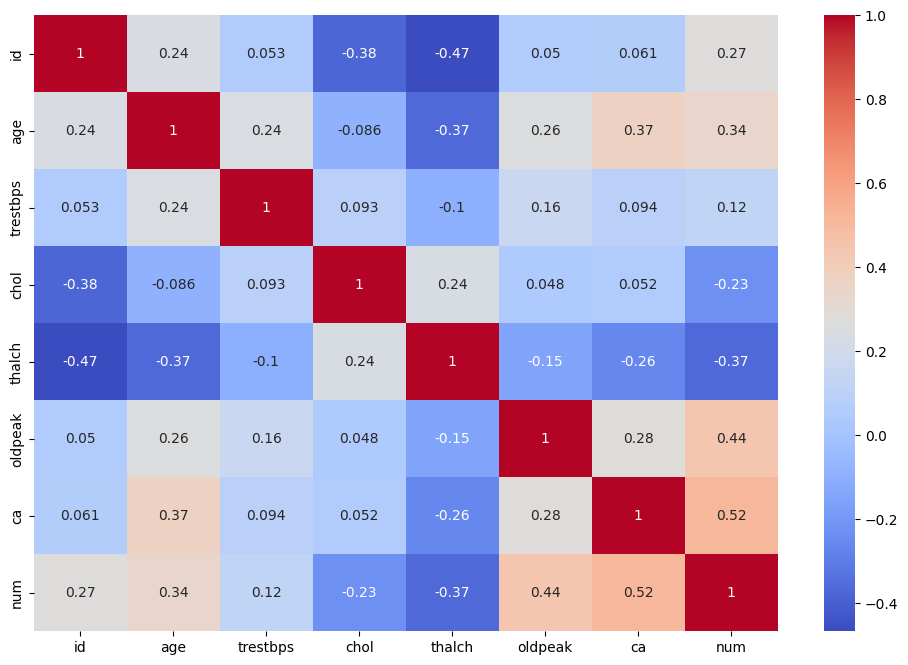

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [4]:
# Cek korelasi hanya untuk fitur numerik
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# Cek data kosong
print(df.isnull().sum())

5. Data Preprocessing

In [7]:
# 1. Menangani missing values
df = df.dropna()

# 2. Label Encoding untuk semua kolom teks (objek)
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# 3. Normalisasi fitur 
scaler = StandardScaler()

# 4. Menyimpan dataset bersih 
df.to_csv('heart_disease_clean.csv', index=False)
print("Preprocessing selesai. Dataset disimpan sebagai heart_disease_clean.csv")

Preprocessing selesai. Dataset disimpan sebagai heart_disease_clean.csv
